# JDSZR6, Jonasz Krawczyk
## zadanie domowe nr 13

**treść zadania**

Na podstawie zbioru https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data dokonaj klasteryzacji różnych rodzajów noclegów oferowanych przez Airbnb. Proponowane zmienne do klasteryzacji:

latitude
longitude
Price
minimum nights
Number of reviews lub number of reviews per month
Proszę o wybranie minimum 4 zmiennych. Klasteryzacja pozwoli nam na znalezienie obiektów położonych w podobnym miejscu i o zbliżonych cenach i warunkach. Należy wyznaczyć optymalną liczbę klastrów z graficznym objaśnieniem. Trzeba pamiętać o zachowaniu poprawności założeń (np. standaryzacja zmiennych).


---
### STANDARYZACJA

## 1. importy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

## 2. analiza danych

W tym punkcie będę chciał na tyle poeksplorować dane aby je zrozumieć. Zadaniem jest pogrupowanie obiektów; nie ma tu konkretnego targetu (uczenie nienadzorowane).

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.shape

(48895, 16)

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Myślę, że niepotrzebne są zmienne: 'id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'. Przy tej okazji dataframe zostanie oczyszczony z NaNów.

In [9]:
df.drop(
    ['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'],
    axis=1,
    inplace=True)

Data Frame ma sens dla niezerowej ceny mieszkania i takiego które w ogóle można wynająć (jest dostępne w ciągu nadchodzącego roku). Dodatkowo, ponieważ jest to Air BnB to co do zasady powinno dotyczyć ofert krótkoterminowych. Usunę oferty od Januszy, którzy wrzucają swoje ogłoszenia na każdy portal:

In [10]:
df = df[df.price > 0]
df = df[df.availability_365 > 0]
df = df[df.minimum_nights < 30]

In [11]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,129


In [12]:
df.duplicated().any()

False

In [13]:
def value_counter(data_frame, list_of_variables):
    for i in list_of_variables:
        print(data_frame[i].value_counts())
        print()

In [14]:
variables = ['neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights']

In [15]:
value_counter(df, variables)

Brooklyn         11167
Manhattan        10962
Queens            3989
Bronx              878
Staten Island      316
Name: neighbourhood_group, dtype: int64

Bedford-Stuyvesant    2259
Williamsburg          1889
Harlem                1566
Bushwick              1287
Hell's Kitchen        1149
                      ... 
Silver Lake              1
Rossville                1
Willowbrook              1
Richmondtown             1
Fort Wadsworth           1
Name: neighbourhood, Length: 218, dtype: int64

Entire home/apt    13648
Private room       12892
Shared room          772
Name: room_type, dtype: int64

1     7741
2     7713
3     5033
4     1958
5     1623
7     1074
6      427
29     320
14     307
10     247
28     170
15     158
20     134
21      72
8       68
25      50
9       47
12      47
13      26
18      16
11      16
24      12
26      11
27      11
16       9
17       7
22       6
19       5
23       4
Name: minimum_nights, dtype: int64



dość problematyczne jest 'neighbourhood', które w zasadzie ma 218 kategorii

In [16]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])
print("non numeric:", cat_df.columns)
print()
print("numeric:", num_df.columns)

non numeric: Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

numeric: Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'availability_365'],
      dtype='object')


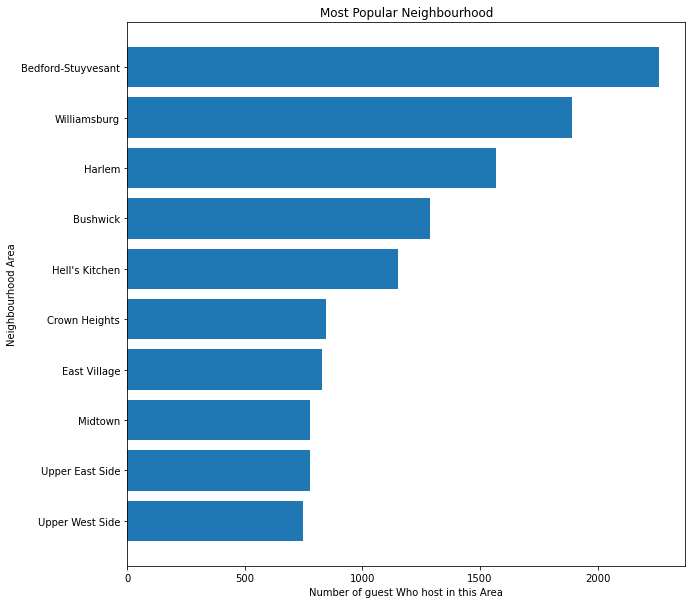

In [17]:
plt.figure(figsize=(10, 10))
data = df.neighbourhood.value_counts()[:10]
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)
plt.show()

In [18]:
le = LabelEncoder()
df[cat_df.columns] = df[cat_df.columns].apply(
    lambda col: le.fit_transform(col))

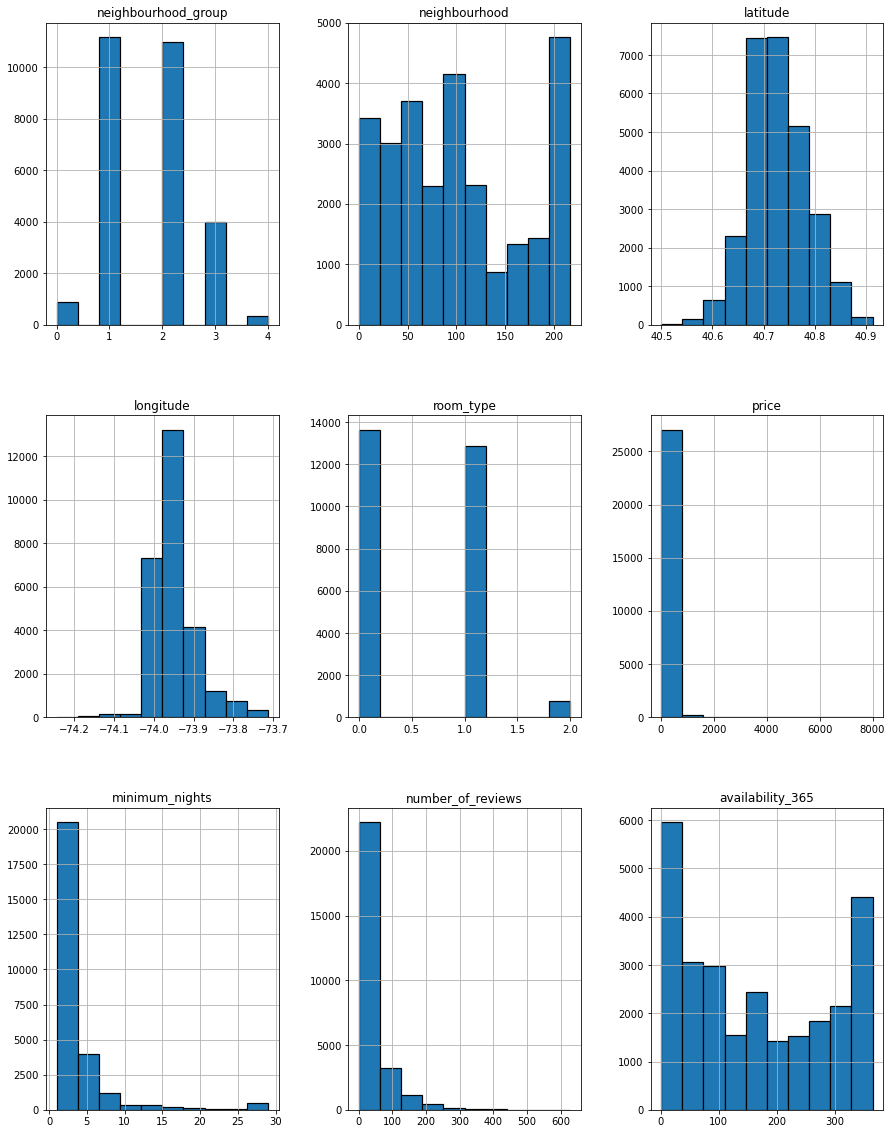

In [19]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(15, 20))
plt.show()

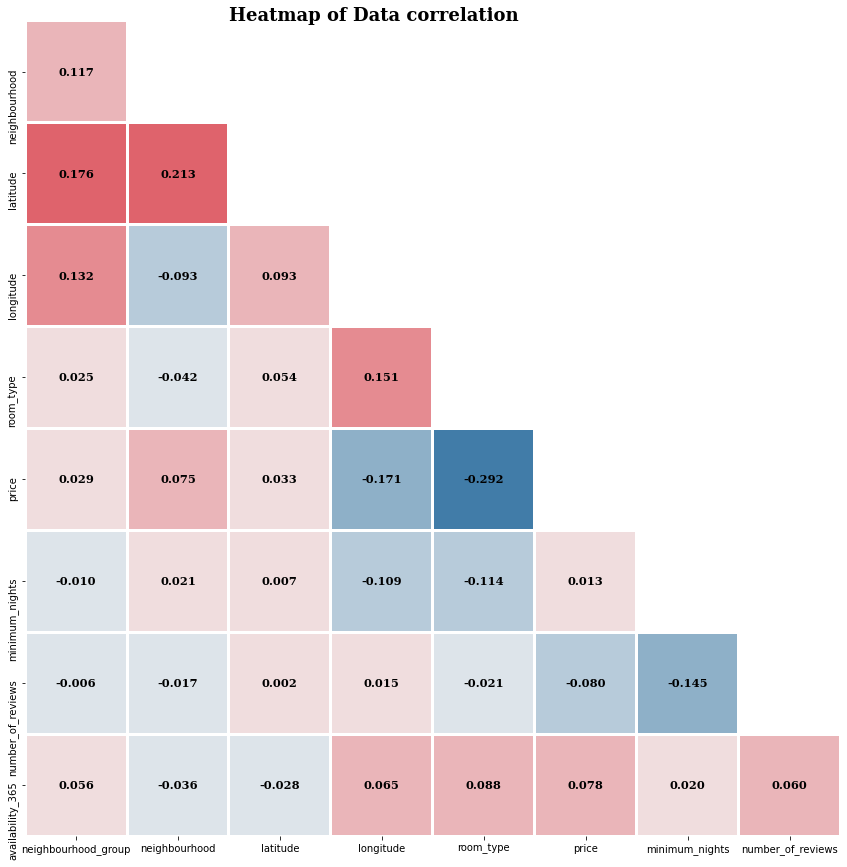

In [20]:
plt.figure(figsize=(15, 15))

df_copy1 = df.copy()
df_corr = df_copy1.corr()

color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(df_corr), k=0)
mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".3f",
            cmap=color_map,
            center=0,
            vmin=-0.293,
            vmax=0.214,
            cbar=False,
            linewidth=2,
            square=True,
            annot_kws={
                'font': 'serif',
                'size': 11.5,
                'color': 'black',
                'fontweight': 'bold'
            })
plt.text(2,
         0,
         'Heatmap of Data correlation',
         fontsize=18,
         fontweight='bold',
         fontfamily='serif')
pass

nie ma tu zmiennych silnie skorelowanych; spodziewałem się większej zależności ceny od współrzędnych

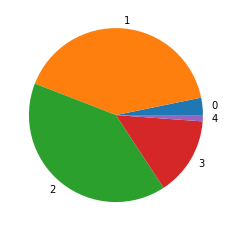

In [21]:
nei = df.groupby('neighbourhood_group')['longitude'].agg(['count'])
nei.reset_index(level=0, inplace=True)
plt.pie(nei['count'], labels=nei['neighbourhood_group'])
plt.show()

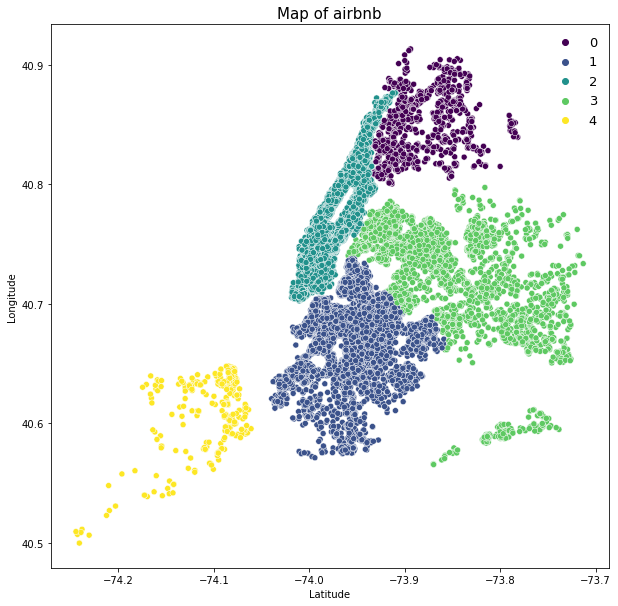

In [22]:
plt.figure(figsize=(10, 10))
a = sns.scatterplot(data=df,
                    x='longitude',
                    y='latitude',
                    hue='neighbourhood_group',
                    palette='viridis')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

ktośby powiedział, że właśnie zrobiłem klasteryzację, idę do domu.

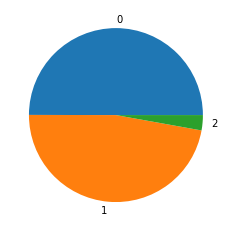

In [23]:
nei = df.groupby('room_type')['latitude'].agg(['count'])
nei.reset_index(level=0, inplace=True)
plt.pie(nei['count'], labels=nei['room_type'])
plt.show()

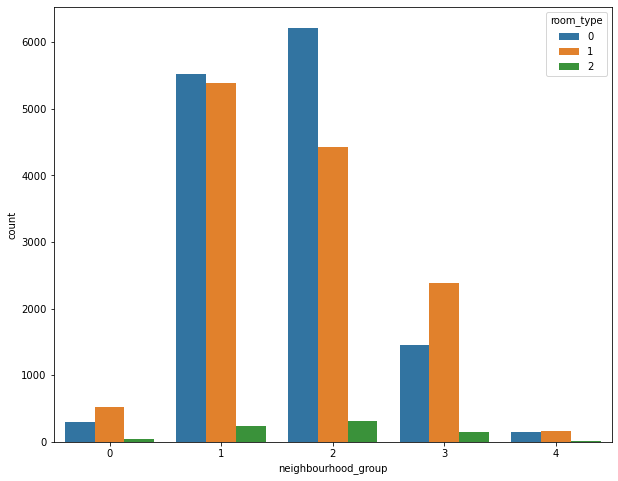

In [24]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(
    x=df['neighbourhood_group'],
    hue=df['room_type'])
plt.show()

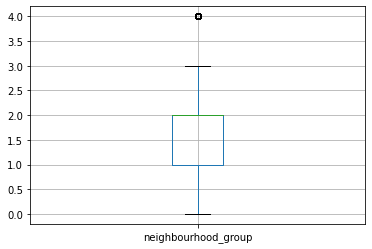

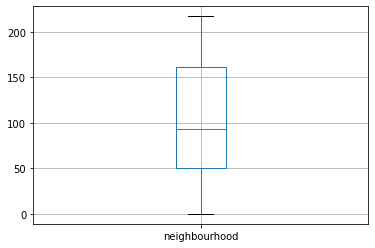

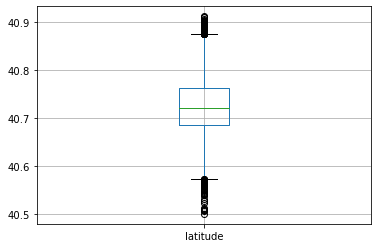

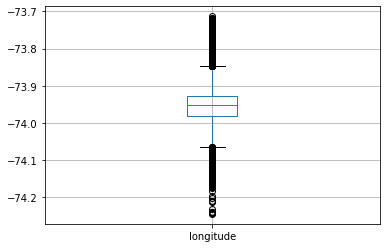

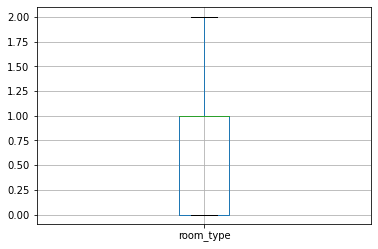

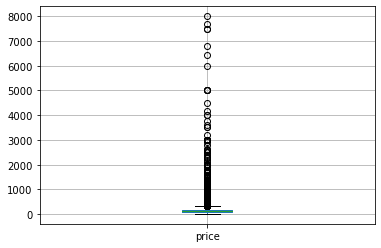

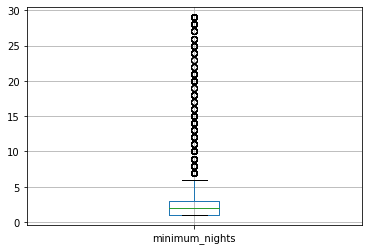

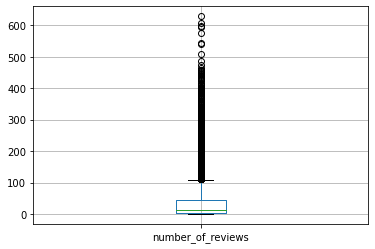

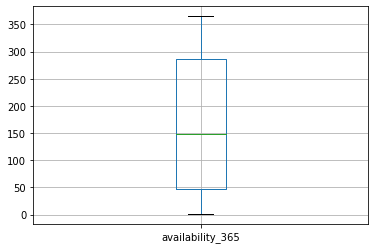

In [25]:
for column in df:
    plt.figure()
    df.boxplot([column])

outliery pozostawię.

## 3. przygotowanie zbioru, ustanowienie modelu

#### 3.1 outliery

In [26]:
# df.columns

In [27]:
# cols = [
#     'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
#     'minimum_nights', 'number_of_reviews', 'availability_365'
# ]

In [28]:
# Q1 = df[cols].quantile(0.25)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] >
#                                            (Q3 + 1.5 * IQR))).any(axis=1)]

#### 3.2 standaryzacja

In [29]:
StSc = StandardScaler()

In [30]:
dfs = df.copy()
dfs = StSc.fit_transform(dfs)
dfs = pd.DataFrame(dfs, columns = df.columns)

#### 3.3 normalizacja

In [31]:
# NoSc = MinMaxScaler()

In [32]:
# dfs = df.copy()
# dfs = NoSc.fit_transform(dfs)
# dfs = pd.DataFrame(dfs, columns = df.columns)

In [33]:
dfs

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,-0.871817,0.080520,-1.371505,-0.487275,0.852645,-0.038663,-0.550915,-0.489933,1.603145
1,0.380738,0.363869,0.462592,-0.702462,-0.955948,0.311622,-0.550915,0.179785,1.523029
2,0.380738,-0.128263,1.419993,0.087877,0.852645,-0.034054,-0.117214,-0.657363,1.603145
3,-0.871817,-0.918658,-0.720852,-0.249249,-0.955948,-0.315203,-0.550915,4.365520,0.233173
4,0.380738,0.513000,0.359767,-0.536919,-0.955948,0.196397,-0.117214,0.719279,-0.287577
...,...,...,...,...,...,...,...,...,...
27307,-0.871817,-1.336225,-0.835084,-0.064075,0.852645,-0.402774,-0.334065,-0.657363,-1.248961
27308,-0.871817,-1.112528,-0.432249,0.252664,0.852645,-0.541044,0.099636,-0.657363,-1.032649
27309,0.380738,-0.128263,1.519017,-0.039914,-0.955948,-0.195369,1.400738,-0.657363,-1.104753
27310,0.380738,-0.113350,0.529818,-0.841201,2.661237,-0.471909,-0.550915,-0.657363,-1.305041


#### 3.4 dla formalności - postawienie modelu

In [34]:
x = np.array(dfs)
kmeans = KMeans(random_state=997).fit(x)
cluser_labels = kmeans.labels_

## 4. wybór optymalnego K

In [35]:
feat_list_1 = [
    'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
    'minimum_nights', 'number_of_reviews', 'availability_365'
]

In [36]:
feat_list_2 = [
    'neighbourhood_group', 'neighbourhood', 'room_type',
    'minimum_nights', 
]

In [37]:
feat_list_3 = ['number_of_reviews', 'price']

In [38]:
def variance_plotter(feats):
    features = feats
    features.append('longitude')
    features.append('latitude')
    dfv = dfs[features]
    global x
    x = np.array(dfv)
    kmeans = KMeans(random_state=997).fit(x)
    cluser_labels = kmeans.labels_

    k_vec = []
    int_vec = []

    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=997).fit(x)
        interia = kmeans.inertia_
        k_vec.append(k)
        int_vec.append(interia)

    plt.figure(figsize=(12, 10))
    plt.title('Wykres sum wariancji klastów')
    plt.plot(k_vec, int_vec, 'bo-')
    plt.xlabel('liczba klastrów')
    plt.ylabel('Suma wariancji klastrów')
    plt.show()

In [39]:
def map_plotter(clusters):
    kmeans = KMeans(n_clusters=clusters, random_state=997).fit(x)
    cluser_labels = kmeans.labels_
    plt.figure(figsize=(10, 10))
    plt.title('air BnB - clusterization')
    plt.xlabel('latitude-scaled')
    plt.ylabel('longitude-scaled')
    plt.scatter(x[:, -1], x[:, -2], c=cluser_labels, s=20, cmap='Dark2')
    plt.show()
    inertia = "{:,}".format(round(kmeans.inertia_))
    print("clusters inertia :", inertia)

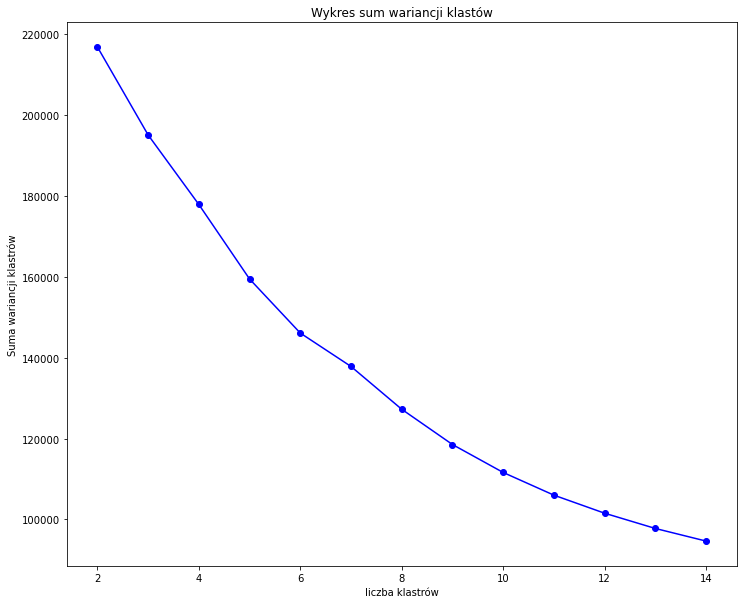

In [40]:
variance_plotter(feat_list_1)

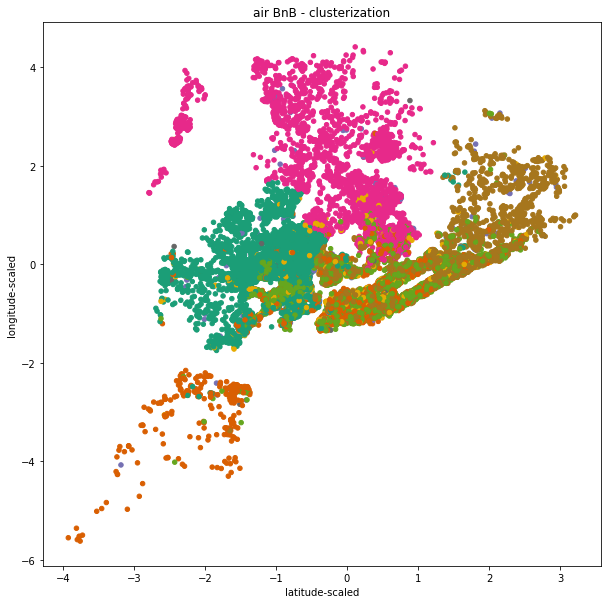

clusters inertia : 127,229


In [41]:
map_plotter(8)

Nie daje się zauważyć stabilizacji wariancji chociaż mapka o czymś już informuje; spróbuję z mniejszą ilością danych. Tylko kilka widocznych grupy z ustawionych ośmiu.

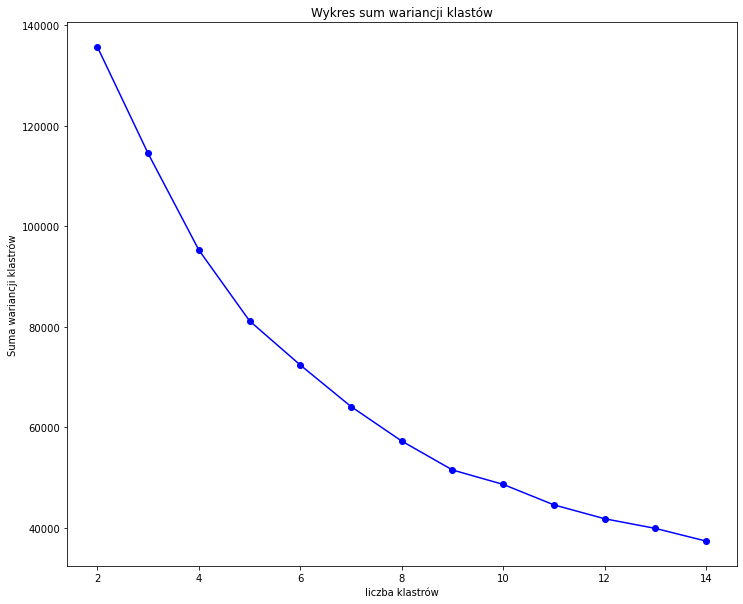

In [42]:
variance_plotter(feat_list_2)

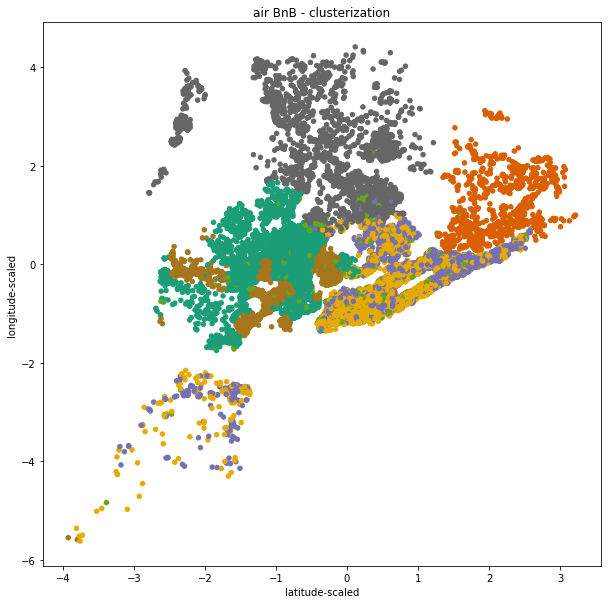

clusters inertia : 64,101


In [43]:
map_plotter(7)

Znacząco spadła wariancja, chociaż mapka nadal jest zagmatwana. Niemniej jednak kształtuje się już jakaś zależność. Spróbuję użyć jeszcze mniej informacji (tj. 4, zgodnie z poleceniem).

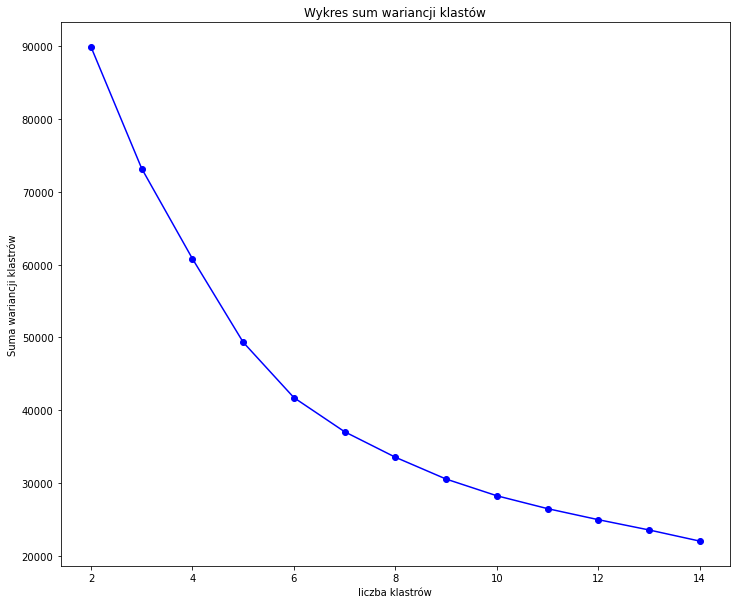

In [44]:
variance_plotter(feat_list_3)

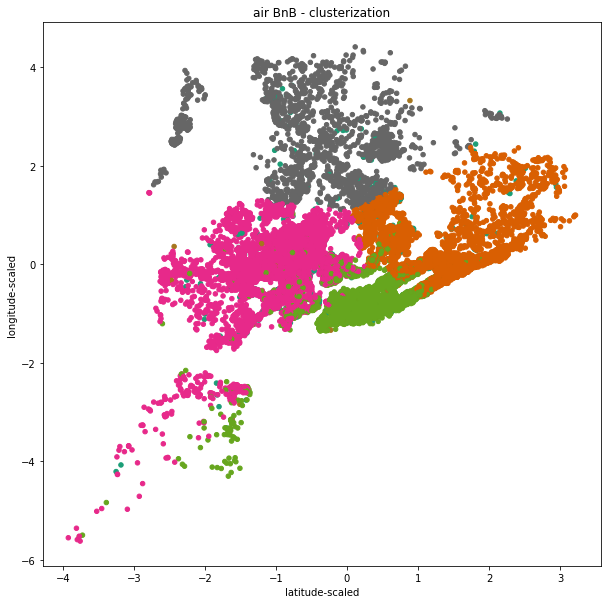

clusters inertia : 41,737


In [45]:
map_plotter(6)

Spadła trochę wariancja i klasteryzacja 'wygląda' dobrze, chociaż z 6 grup widoczne są tylko 4 główne.

## 5. podsumowanie i wnioski

Wraz ze spadkiem ilości cech modelu, spada także suma wariancji, znaczy dopasowanie jest lepsze. Na ostatniej mapce ukształtowały się ramy terytorialne podziału rynku.<br>
Taki model jednak ma małą ilość zmiennych, ledwie cztery, z czego dwie to współrzędne.<br>
Duże znaczenie na wyniki ma także odpowiedni dobór zestawu cech wejściowych do modelu.<br>
Model można dopracować na bazie ostatniego tak, aby niektóre klastry nie były 'jedzone' przez dominujące, zalecałbym także spróbować dodać cechę do listy.

## BRUDNOPIS